<a href="https://colab.research.google.com/github/jhlopesalves/data-science-notebooks/blob/main/Python/projects/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

## Dataset Description

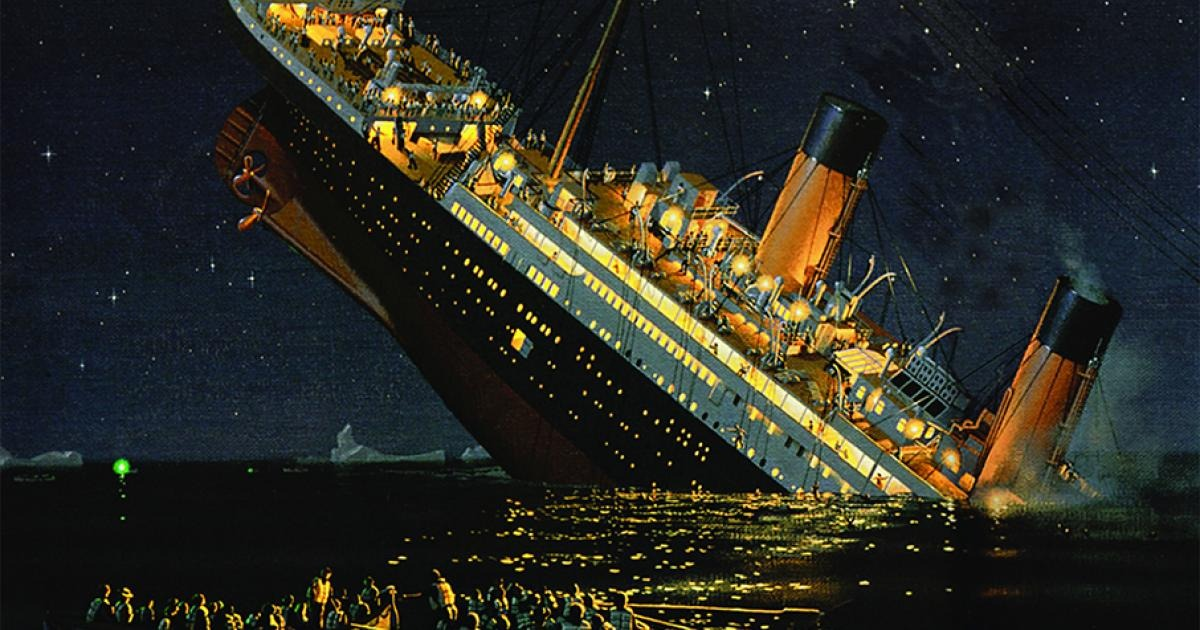

### Overview
The data for this task is split into three files:

- **Training set** (`train.csv`): This dataset is used to build your machine learning models. It includes the outcome (ground truth) for each passenger, indicating whether they survived or not. It contains features like gender, class, and others. You can also engineer new features from the existing ones.
- **Test set** (`test.csv`): This dataset is used to evaluate the performance of your model on unseen data. It does not include the ground truth for survival. Your task is to predict the survival outcome for each passenger in this set.
- **Gender submission** (`gender_submission.csv`): This file is an example submission in the correct format. It assumes all female passengers survived and all male passengers did not.

### Data Dictionary
This table describes the different variables (features) in the dataset:

| Variable   | Definition                  | Key                                                                 |
|------------|-----------------------------|---------------------------------------------------------------------|
| survival  | Survival                    | 0 = No, 1 = Yes                                                    |
| pclass    | Ticket class                | 1 = 1st, 2 = 2nd, 3 = 3rd                                          |
| sex       | Sex                         | male or female                                                      |
| Age       | Age in years                | Can be fractional if less than 1. Estimated ages are in the form xx.5. |
| sibsp     | # of siblings/spouses aboard| Number of siblings or spouses aboard. Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés ignored). |
| parch     | # of parents/children aboard| Number of parents or children aboard. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children traveled only with a nanny, so parch=0 for them. |
| ticket    | Ticket number               |                                                                     |
| fare      | Passenger fare              |                                                                     |
| cabin     | Cabin number                |                                                                     |
| embarked  | Port of Embarkation         | C = Cherbourg, Q = Queenstown, S = Southampton                      |

### Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper Class
  - 2nd = Middle Class
  - 3rd = Lower Class

## Getting Started

To begin, you can load the `train.csv` and `test.csv` files into pandas DataFrames to explore the data and start building your survival prediction model.

Once loaded, you can start exploring the data using methods like `.head()`, `.info()`, and `.describe()` to understand its structure, data types, and summary statistics. Good luck!

In [9]:
import pandas as pd
import numpy as np
import random as rnd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so


# machine learning
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Ignore warnings for a cleaner notebook
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('gender_submission.csv') # To get PassengerId for submission

# Combine train and test sets for consistent preprocessing
# We store the original sizes to split them back later
train_size = len(train_df)
combined_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)
print("Combined data shape:", combined_df.shape)

# Store the target variable separately
y_train = train_df['Survived']

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Overview

We check the feature structure and identify categorical and numerical features, missing data, and basic statistics.

### Initial Exploration


In [4]:
print(train_df.info())
print(test_df.info())
print(train_df.describe())
print(train_df.describe(include=["O"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

## Feature Analysis

We visualise key features against survival outcome to find predictive signal.


In [12]:
# Initial data inspection
print("Data Information:")
combined_df.info()

print("\nMissing Values:")
print(combined_df.isnull().sum())

# Visualise survival rates based on key categorical features
plt.style.use("fivethirtyeight")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Survival by Sex
sns.countplot(x="Sex", hue="Survived", data=train_df, ax=axes[0, 0])
axes[0, 0].set_title("Survival Rate by Sex")
axes[0, 0].legend(title="Survived", labels=["No", "Yes"])

# Survival by Pclass
sns.countplot(x="Pclass", hue="Survived", data=train_df, ax=axes[0, 1])
axes[0, 1].set_title("Survival Rate by Passenger Class")
axes[0, 1].legend(title="Survived", labels=["No", "Yes"])

# Survival by Embarked
sns.countplot(x="Embarked", hue="Survived", data=train_df, ax=axes[1, 0])
axes[1, 0].set_title("Survival Rate by Port of Embarkation")
axes[1, 0].legend(title="Survived", labels=["No", "Yes"])

# Age distribution by survival
sns.kdeplot(
    train_df.loc[train_df["Survived"] == 0, "Age"].dropna(),
    label="Did Not Survive",
    ax=axes[1, 1],
    shade=True,
)
sns.kdeplot(
    train_df.loc[train_df["Survived"] == 1, "Age"].dropna(),
    label="Survived",
    ax=axes[1, 1],
    shade=True,
)
axes[1, 1].set_title("Age Distribution of Survivors")
axes[1, 1].set_xlabel("Age")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Data Information:


NameError: name 'combined_df' is not defined

C:\Users\jhonm\AppData\Local\Temp\ipykernel_22588\3187992893.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.columns)


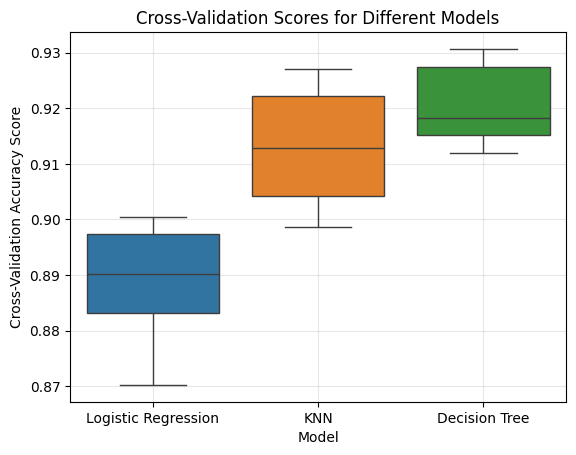

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering: Title Extraction

Social titles embedded within passenger names contain valuable predictive information reflecting social status, age, and gender conventions of the era. Extracting titles from the name field creates a new categorical feature that may demonstrate stronger relationships with survival outcomes than individual name components.

In [ ]:
titanic["Title"] = (
    titanic["Name"]
    .str.split(",", expand=True)[1]
    .str.split(".", expand=True)[0]
    .str.strip()
)
titanic = titanic.drop(columns=["Name"])
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0.0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [ ]:
titanic = titanic[
    [
        "Title",
        "Sex",
        "Age",
        "SibSp",
        "Parch",
        "PassengerId",
        "Pclass",
        "Embarked",
        "Cabin",
        "Fare",
        "Ticket",
        "Survived",
    ]
]
titanic.head()

,Title,Sex,Age,SibSp,Parch,PassengerId,Pclass,Embarked,Cabin,Fare,Ticket,Survived
0,Mr,male,22.0,1,0,1,3,S,NaN,7.2500,A/5 21171,0.0
1,Mrs,female,38.0,1,0,2,1,C,C85,71.2833,PC 17599,1.0
2,Miss,female,26.0,0,0,3,3,S,NaN,7.9250,STON/O2. 3101282,1.0
3,Mrs,female,35.0,1,0,4,1,S,C123,53.1000,113803,1.0
4,Mr,male,35.0,0,0,5,3,S,NaN,8.0500,373450,0.0


In [ ]:
titanic["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

## Title Standardization and Grouping

Consolidating variant spellings and grouping rare titles addresses the challenge of categorical variables with low-frequency categories. This preprocessing step reduces model complexity while preserving meaningful social distinctions. The "Rare" category captures aristocratic and professional titles that, while individually uncommon, may share similar survival characteristics.

In [ ]:
titanic["Title"] = titanic["Title"].replace("Mlle", "Miss")
titanic["Title"] = titanic["Title"].replace("Ms", "Miss")
titanic["Title"] = titanic["Title"].replace("Mme", "Mrs")
titanic["Title"] = titanic["Title"].replace(
    [
        "Lady",
        "the Countess",
        "Capt",
        "Col",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Don",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)

## Cross-Tabulation Analysis

Creating a cross-tabulation between title and gender validates the consistency of the title extraction process and reveals any anomalies in the data. This analysis confirms that the social conventions of the era are properly reflected in the title assignments.

In [ ]:
pd.crosstab(titanic["Title"], titanic["Sex"])

Sex,female,male
Title,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Rare,4,25


## Survival Rate Analysis by Title

Computing survival rates by title reveals the predictive power of this engineered feature. This analysis demonstrates how social status and gender norms of the era influenced survival outcomes, providing valuable insight for model development.

In [ ]:
titanic[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Title Encoding for Machine Learning

Converting categorical titles to numerical values enables machine learning algorithms to process this feature effectively. The mapping preserves the ordinal relationships suggested by survival rates while creating a format suitable for mathematical operations within predictive models.

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic["Title"] = titanic["Title"].map(title_mapping)
titanic["Title"] = titanic["Title"].fillna(0)
titanic["Title"] = titanic["Title"].round(0).astype(int)

## Verification of Title Encoding

Cross-tabulating the encoded titles with gender serves as a quality check, ensuring the numerical mapping preserves the intended categorical relationships and that no encoding errors were introduced during the transformation process.

In [ ]:
pd.crosstab(titanic["Title"], titanic["Sex"])

Sex,female,male
Title,,
1,0,757
2,264,0
3,198,0
4,0,61
5,4,25


In [ ]:
titanic["Age"].isnull().sum()

np.int64(263)

## Age Imputation Strategy

Median imputation for missing age values represents a robust approach that minimizes the influence of outliers while maintaining the central tendency of the age distribution. Converting ages to integers simplifies the data representation and aligns with the discrete nature of age reporting in historical records.

In [ ]:
titanic["Age"] = titanic["Age"].fillna((titanic["Age"].median()))
titanic["Age"] = titanic["Age"].astype(int)
titanic.head(10)

,Title,Sex,Age,SibSp,Parch,PassengerId,Pclass,Embarked,Cabin,Fare,Ticket,Survived
0,1,male,22,1,0,1,3,S,NaN,7.2500,A/5 21171,0.0
1,3,female,38,1,0,2,1,C,C85,71.2833,PC 17599,1.0
2,2,female,26,0,0,3,3,S,NaN,7.9250,STON/O2. 3101282,1.0
3,3,female,35,1,0,4,1,S,C123,53.1000,113803,1.0
4,1,male,35,0,0,5,3,S,NaN,8.0500,373450,0.0
5,1,male,28,0,0,6,3,Q,NaN,8.4583,330877,0.0
6,1,male,54,0,0,7,1,S,E46,51.8625,17463,0.0
7,4,male,2,3,1,8,3,S,NaN,21.0750,349909,0.0
8,3,female,27,0,2,9,3,S,NaN,11.1333,347742,1.0
9,3,female,14,1,0,10,2,C,NaN,30.0708,237736,1.0


## Feature Reduction and Data Cleaning

Removing the cabin and ticket columns addresses features with excessive missing values and high cardinality that provide limited predictive value. This dimensionality reduction focuses the analysis on more reliable and informative features while improving computational efficiency.

In [ ]:
titanic = titanic.drop(["Cabin", "Ticket"], axis=1)

## Fare Data Standardization

Rounding fare values to two decimal places standardizes the precision and removes potential floating-point artifacts that may have been introduced during data processing. This standardization improves data consistency and readability.

In [ ]:
titanic["Fare"] = titanic["Fare"].round(2)

## Embarked Port Imputation

Filling missing embarkation port values with the mode preserves the most common boarding location while avoiding the introduction of artificial categories. This approach maintains the distributional characteristics of the embarkation feature.

In [ ]:
freq_port = titanic["Embarked"].dropna().mode()[0]
titanic["Embarked"] = titanic["Embarked"].fillna(freq_port)

## Embarkation Port Survival Analysis

Examining survival rates by embarkation port reveals geographical patterns that may reflect socioeconomic factors or boarding conditions. This analysis informs the encoding strategy for this categorical variable.

In [ ]:
titanic[["Embarked", "Survived"]].groupby(
    ["Embarked"], as_index=False
).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Embarkation Port Encoding

Converting port categories to numerical values using a mapping based on survival rates creates an ordinal encoding that preserves the predictive relationships observed in the exploratory analysis. This encoding strategy enhances the feature's utility for machine learning algorithms.

In [ ]:
titanic["Embarked"] = titanic["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)
titanic.head(10)

,Title,Sex,Age,SibSp,Parch,PassengerId,Pclass,Embarked,Fare,Survived
0,1,male,22,1,0,1,3,0,7.25,0.0
1,3,female,38,1,0,2,1,1,71.28,1.0
2,2,female,26,0,0,3,3,0,7.92,1.0
3,3,female,35,1,0,4,1,0,53.10,1.0
4,1,male,35,0,0,5,3,0,8.05,0.0
5,1,male,28,0,0,6,3,2,8.46,0.0
6,1,male,54,0,0,7,1,0,51.86,0.0
7,4,male,2,3,1,8,3,0,21.08,0.0
8,3,female,27,0,2,9,3,0,11.13,1.0
9,3,female,14,1,0,10,2,1,30.07,1.0


In [ ]:
titanic["Survived"] = titanic["Survived"].astype("bool")

## Fare Missing Value Imputation

Addressing missing fare values through median imputation maintains consistency with the age imputation strategy. The median provides a robust central tendency measure that is less sensitive to extreme fare values, ensuring stable model inputs.

In [ ]:
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

## Gender Encoding with Dummy Variables

Creating dummy variables for gender transforms the binary categorical variable into a format required by many machine learning algorithms. This one-hot encoding eliminates ordinal assumptions and ensures that gender is treated as a nominal categorical variable.

In [ ]:
titanic_dummy = pd.get_dummies(titanic, columns=["Sex"], prefix="Sex")

In [ ]:
missing_counts = titanic.isnull().sum()
print(missing_counts)

Title          0
Sex            0
Age            0
SibSp          0
Parch          0
PassengerId    0
Pclass         0
Embarked       0
Fare           0
Survived       0
dtype: int64


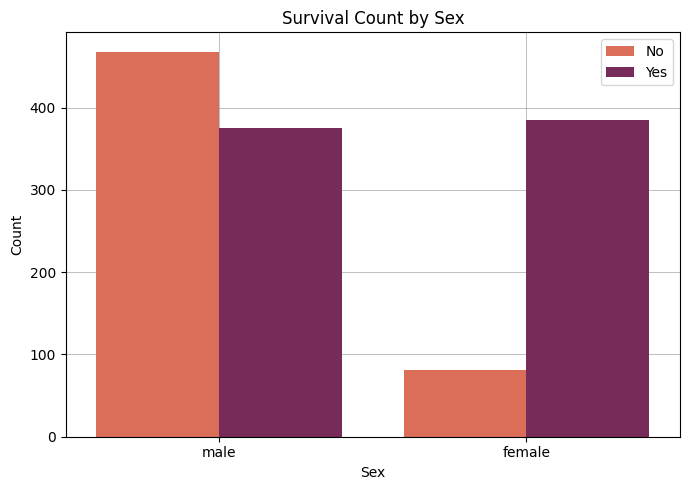

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.countplot(data=titanic, x="Sex", hue="Survived", palette="rocket_r", ax=ax)
ax.set(xlabel="Sex", ylabel="Count", title="Survival Count by Sex")
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)
ax.legend(labels=["No", "Yes"])

plt.tight_layout()
plt.show()

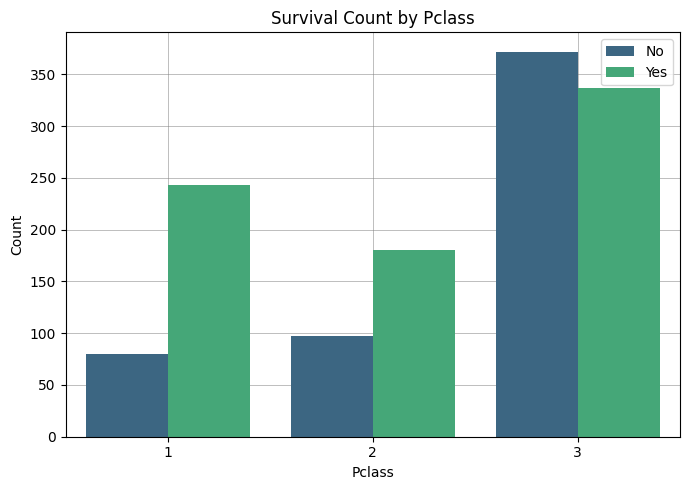

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.countplot(data=titanic, x="Pclass", hue="Survived", palette="viridis", ax=ax)
ax.set(xlabel="Pclass", ylabel="Count", title="Survival Count by Pclass")
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)
ax.legend(labels=["No", "Yes"])

plt.tight_layout()
plt.show()

## Feature and Target Variable Definition

Separating features from the target variable establishes the supervised learning framework. The feature matrix X contains all predictor variables after preprocessing, while the target vector y represents the binary survival outcome. This separation is fundamental to the machine learning workflow.

In [ ]:
X = titanic_dummy.drop("Survived", axis=1)
y = titanic_dummy["Survived"]

### Logistic Regression

Logistic regression serves as the baseline model for this binary classification problem. This linear approach provides interpretable coefficients and probabilistic outputs, making it ideal for understanding feature importance and establishing performance benchmarks. The inclusion of data standardization addresses potential scale differences between features.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

# Calculate metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)
logloss_logreg = log_loss(y_test, y_pred)

print("Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy_logreg:.4f}")
print(f"  Precision: {precision_logreg:.4f}")
print(f"  Recall: {recall_logreg:.4f}")
print(f"  F1-Score: {f1_logreg:.4f}")
print(f"  ROC-AUC: {roc_auc_logreg:.4f}")
print(f"  Log Loss: {logloss_logreg:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.7977
  Precision: 0.8037
  Recall: 0.8618
  F1-Score: 0.8317
  ROC-AUC: 0.7855
  Log Loss: 7.2913


### Random Forest Classifier

Random Forest represents an ensemble approach that combines multiple decision trees to reduce overfitting and improve generalization. This algorithm excels at capturing non-linear relationships and feature interactions while providing built-in feature importance measures. The ensemble nature makes it robust to outliers and noise in the data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_class = RandomForestClassifier(n_estimators=150, random_state=42)
rf_class.fit(X_train_scaled, y_train)
y_pred = rf_class.predict(X_test_scaled)

# Calculate metrics for Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)
logloss_rf = log_loss(y_test, y_pred)

print("Random Forest Classifier Metrics:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-Score: {f1_rf:.4f}")
print(f"  ROC-AUC: {roc_auc_rf:.4f}")
print(f"  Log Loss: {logloss_rf:.4f}")

Random Forest Classifier Metrics:
  Accuracy: 0.8969
  Precision: 0.9195
  Recall: 0.9013
  F1-Score: 0.9103
  ROC-AUC: 0.8961
  Log Loss: 3.7144


### Gradient Boosting Classifier

Gradient boosting implements a sequential ensemble approach where each subsequent model attempts to correct the errors of previous models. This technique often achieves superior performance in classification tasks by iteratively improving predictions. The learning rate and max depth parameters control the trade-off between model complexity and generalization.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb_class = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.5, max_depth=3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_class.fit(
    X_train_scaled,
    y_train,
)
y_pred = xgb_class.predict(X_test_scaled)

# Calculate metrics for Gradient Boosting Classifier
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred)
logloss_xgb = log_loss(y_test, y_pred)

print("Gradient Boosting Classifier Metrics:")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall: {recall_xgb:.4f}")
print(f"  F1-Score: {f1_xgb:.4f}")
print(f"  ROC-AUC: {roc_auc_xgb:.4f}")
print(f"  Log Loss: {logloss_xgb:.4f}")

Gradient Boosting Classifier Metrics:
  Accuracy: 0.8626
  Precision: 0.8867
  Recall: 0.8750
  F1-Score: 0.8808
  ROC-AUC: 0.8602
  Log Loss: 4.9526


### K-Nearest Neighbors (KNN)
K-Nearest Neighbors provides a non-parametric approach to classification that makes predictions based on the similarity of instances in the feature space. This algorithm can capture complex decision boundaries without assuming a specific functional form. The choice of k=5 neighbors balances between overfitting (low k) and oversimplification (high k).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Calculate metrics for K-Nearest Neighbors (KNN)
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)
logloss_knn = log_loss(y_test, y_pred)

print("K-Nearest Neighbors (KNN) Metrics:")
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall: {recall_knn:.4f}")
print(f"  F1-Score: {f1_knn:.4f}")
print(f"  ROC-AUC: {roc_auc_knn:.4f}")
print(f"  Log Loss: {logloss_knn:.4f}")

K-Nearest Neighbors (KNN) Metrics:
  Accuracy: 0.8321
  Precision: 0.8553
  Recall: 0.8553
  F1-Score: 0.8553
  ROC-AUC: 0.8276
  Log Loss: 6.0531
